### Imports

In [1]:
import tensorflow_datasets as tfds

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.utils import to_categorical

### Load Data

In [4]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

### Image Preprocessing

In [5]:
## check existing image size
train_ds[0].shape

TensorShape([442, 1024, 3])

In [24]:
# Check the shape of the one-hot encoded labels
print("Shape of training labels:", train_labels.shape)  # Should be (num_samples, num_classes)

# The number of classes is the second dimension of the train_labels
num_classes = train_labels.shape[1]
print("Number of unique labels (classes):", num_classes)


Shape of training labels: (2569, 5)
Number of unique labels (classes): 5


In [6]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [7]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0], dtype=int64)>

In [8]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [26]:
train_labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

### Use Pretrained VGG16 Image Classification model

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [11]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [12]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

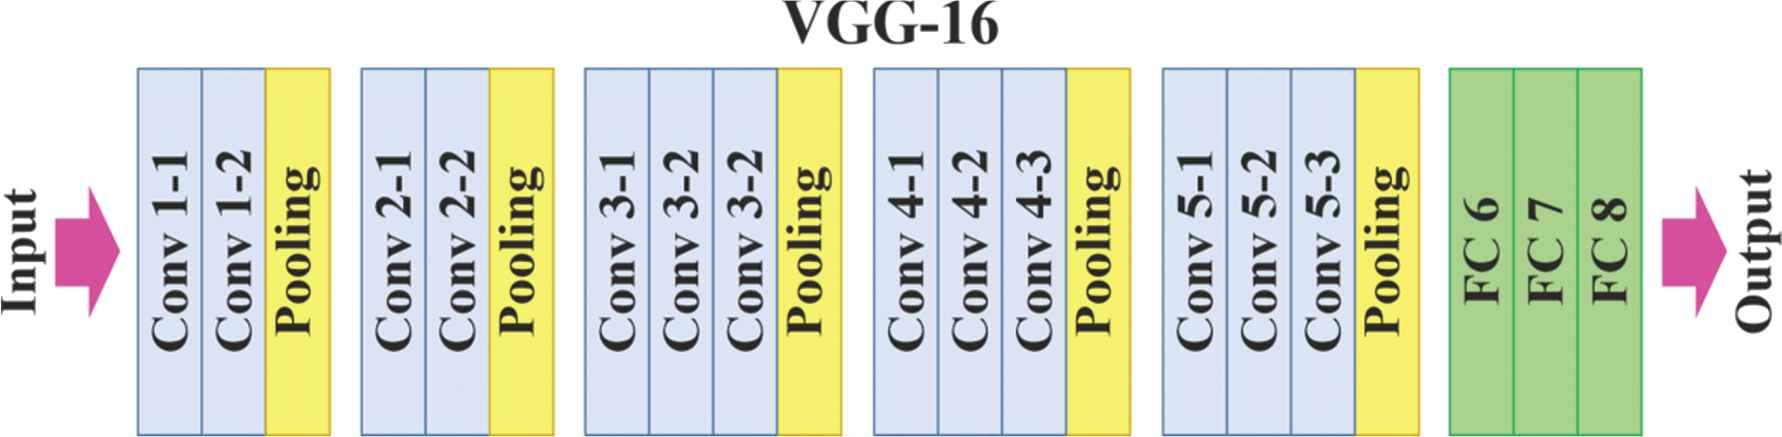

In [13]:
## will not train base mode
# Freeze Parameters in model's lower convolutional layers
base_model.trainable = False 

In [14]:
## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [15]:
## model details
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

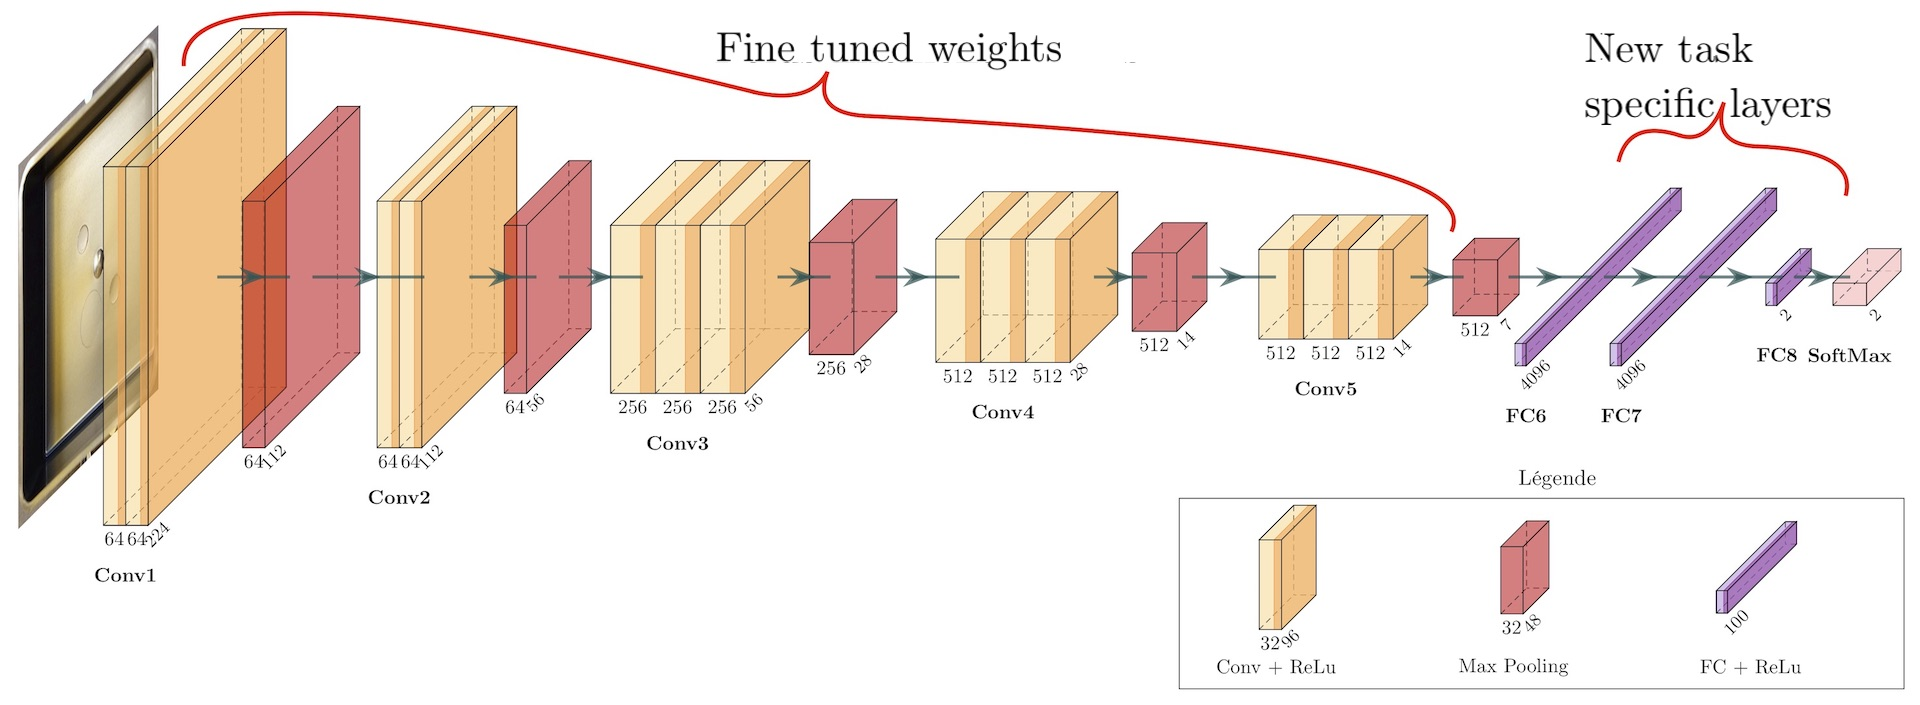

**Add custom classifier with two dense layers of trainable parameters to model**

In [16]:
#add our layers on top of this model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

**Train classifier layers on training data available for task**

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [18]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [19]:
history=model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.3971 - loss: 2.2780 - val_accuracy: 0.6342 - val_loss: 0.9958
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 368s 6s/step - accuracy: 0.7206 - loss: 0.7484 - val_accuracy: 0.6479 - val_loss: 0.9828
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.8181 - loss: 0.5137 - val_accuracy: 0.6770 - val_loss: 0.9108
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.8846 - loss: 0.3411 - val_accuracy: 0.6907 - val_loss: 0.9166
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9089 - loss: 0.2493 - val_accuracy: 0.7043 - val_loss: 0.9701


In [20]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)

35/35 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9232 - loss: 0.2031
Loss:  0.19786936044692993 Accuracy:  0.9273387789726257


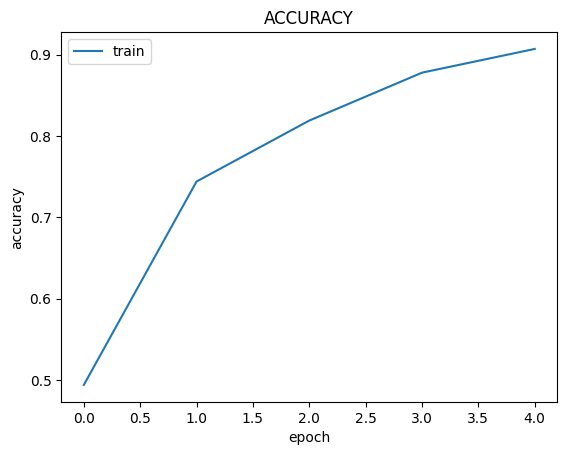

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


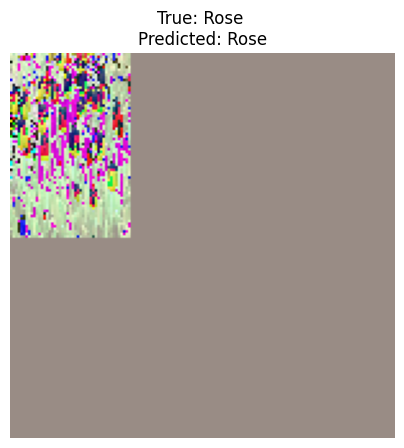

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to display a random test image with prediction
def display_random_prediction(test_images, test_labels, model, class_names):
    # Randomly select an index
    random_index = random.randint(0, len(test_images) - 1)

    # Get the corresponding image and true label
    selected_image = test_images[random_index]
    true_label = test_labels[random_index]
    
    # Reshape the image for prediction
    selected_image = tf.expand_dims(selected_image, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(selected_image)
    predicted_class = np.argmax(prediction)

    # Plotting the image with true and predicted labels
    plt.figure(figsize=(5, 5))
    plt.imshow(selected_image[0].numpy().astype("uint8"))  # Convert back to uint8
    plt.title(f"True: {class_names[np.argmax(true_label)]} \nPredicted: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()

# Assuming class_names is already defined
class_names = ["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"]  # Replace with your actual class names

# Call the function to display a random prediction
display_random_prediction(test_ds, test_labels, model, class_names)


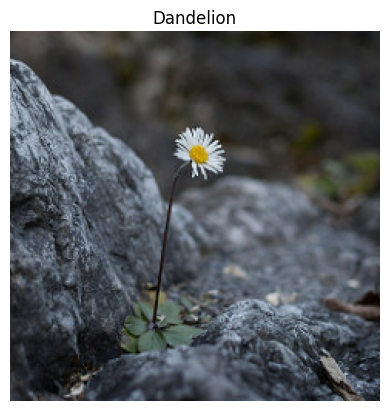

In [29]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random

# Load the dataset (only train split)
train_ds = tfds.load("tf_flowers", split="train", as_supervised=True)

# Convert the train dataset to a list of images and labels
train_images = []
train_labels = []
for img, label in train_ds:
    train_images.append(img)
    train_labels.append(label)

# Define class names (assuming the classes are known)
class_names = ["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"]

# Select a random index
random_index = random.randint(0, len(train_images) - 1)

# Get the corresponding image and label
selected_image = train_images[random_index]
selected_label = train_labels[random_index]

# Display the image
plt.imshow(selected_image.numpy())
plt.title(class_names[selected_label.numpy()])
plt.axis("off")  # Hide axes
plt.show()
